### Unpacking the folders

In [1]:
# Set the testing to either protector or attacker
test = "ATTACKER"

In [2]:
import os
import pandas as pd
from scipy.stats import ttest_ind

def get_final_count_from_file(file_path, kind="Prey"):
    df = pd.read_csv(file_path)
    max_frame = df['frame'].max()
    last_frame_df = df[df['frame'] == max_frame]
    count = last_frame_df[last_frame_df['kind'] == kind].shape[0]
    return count

def gather_counts_from_folder(folder_path, kind="Prey"):
    counts = []
    for filename in os.listdir(folder_path):
        if filename.endswith(".csv"):
            file_path = os.path.join(folder_path, filename)
            count = get_final_count_from_file(file_path, kind)
            counts.append(count)
    return counts

# Set your folder paths
base_case_folder = "/Users/sybemelsert/Documents/Vrije_Universiteit/P6_Collective_Intelligence/collective-intelligence/Assignment_2/test_results/base_case"

test = test.upper()
if test == "ATTACKER":
    variable_folder = "/Users/sybemelsert/Documents/Vrije_Universiteit/P6_Collective_Intelligence/collective-intelligence/Assignment_2/test_results/attacker"
elif test == "PROTECTOR":
    variable_folder = "/Users/sybemelsert/Documents/Vrije_Universiteit/P6_Collective_Intelligence/collective-intelligence/Assignment_2/test_results/protector"
else:
    raise NameError

# Attacker
variable_folder = "/Users/sybemelsert/Documents/Vrije_Universiteit/P6_Collective_Intelligence/collective-intelligence/Assignment_2/test_results/attacker"

# Protector
variable_folder = "/Users/sybemelsert/Documents/Vrije_Universiteit/P6_Collective_Intelligence/collective-intelligence/Assignment_2/test_results/protector"



### Test for prey

In [3]:
protector_counts = gather_counts_from_folder(variable_folder, kind="Prey")
no_protector_counts = gather_counts_from_folder(base_case_folder, kind="Prey")
# Perform Welch's t-test (doesn't assume equal variance)
t_stat, p_value = ttest_ind(protector_counts, no_protector_counts, equal_var=False)

print(f"Protector group counts: {protector_counts}")
print(f"No protector group counts: {no_protector_counts}")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.10f}")

if p_value < 0.05:
    print("Significant difference between groups (reject null hypothesis)")
else:
    print("No significant difference between groups (fail to reject null hypothesis)")

Protector group counts: [0, 4, 3, 2, 3, 1, 5, 3, 2, 2, 4, 2, 3, 5, 3, 0, 2, 3, 3, 1, 1, 2, 4, 3, 2, 2, 3, 4, 0, 5]
No protector group counts: [431, 235, 426, 4, 411, 315, 70, 51, 11, 210, 449, 142, 18, 39, 437, 412, 422, 10, 2, 160, 3, 14, 8, 419, 437, 423, 45, 147, 53, 11]
T-statistic: -5.7115
P-value: 0.0000035231
Significant difference between groups (reject null hypothesis)


### Test for predators

In [4]:
protector_counts = gather_counts_from_folder(variable_folder, kind="Predator")
no_protector_counts = gather_counts_from_folder(base_case_folder, kind="Predator")
# Perform Welch's t-test (doesn't assume equal variance)
t_stat, p_value = ttest_ind(protector_counts, no_protector_counts, equal_var=False)

print(f"Protector group counts: {protector_counts}")
print(f"No protector group counts: {no_protector_counts}")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.10f}")

if p_value < 0.05:
    print("Significant difference between groups (reject null hypothesis)")
else:
    print("No significant difference between groups (fail to reject null hypothesis)")

Protector group counts: [2, 2, 2, 3, 1, 5, 3, 3, 2, 1, 2, 4, 5, 4, 1, 3, 2, 0, 1, 0, 3, 5, 2, 2, 2, 4, 1, 1, 4, 2]
No protector group counts: [0, 0, 0, 9, 0, 0, 24, 0, 17, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 11, 10, 14, 0, 0, 0, 0, 0, 154, 2]
T-statistic: -1.1044
P-value: 0.2784659246
No significant difference between groups (fail to reject null hypothesis)


### Code for heatmap

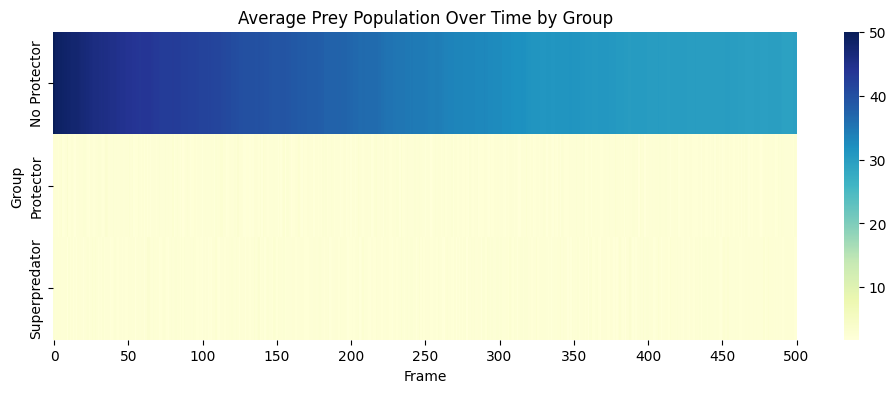

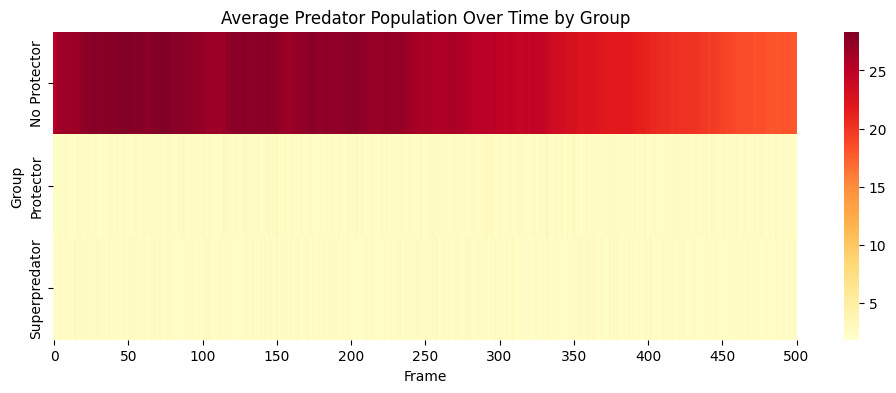

In [ ]:
"""
import os
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Paths to your folders:
folders = {
    "No Protector": "/Users/sybemelsert/Documents/Vrije_Universiteit/P6_Collective_Intelligence/collective-intelligence/Assignment_2/test_results/base_case",
    "Protector": "/Users/sybemelsert/Documents/Vrije_Universiteit/P6_Collective_Intelligence/collective-intelligence/Assignment_2/test_results/protector",
    "Superpredator": "/Users/sybemelsert/Documents/Vrije_Universiteit/P6_Collective_Intelligence/collective-intelligence/Assignment_2/test_results/attacker",
}

def get_average_population_over_time(folder_path, kind, max_frame=1000):
    # Accumulate population counts per frame for all runs in this folder
    population_matrix = []
    
    for filename in os.listdir(folder_path):
        if not filename.endswith(".csv"):
            continue
        df = pl.read_csv(os.path.join(folder_path, filename))
        # Filter for the agent kind
        df_kind = df.filter(pl.col("kind") == kind)
        
        # Count number alive at each frame (0 to max_frame)
        frame_counts = []
        for frame in range(max_frame+1):
            count = df_kind.filter(pl.col("frame") == frame).height
            frame_counts.append(count)
        
        population_matrix.append(frame_counts)
    
    # Convert to numpy array: runs x frames
    population_matrix = np.array(population_matrix)
    
    # Average over runs (axis=0)
    avg_population = np.mean(population_matrix, axis=0)
    return avg_population

# Parameters
max_frame = 500  # adjust depending on your simulation length

# Prepare data for heatmap: each row = group, columns = frames
prey_data = []
predator_data = []

for group_name, folder_path in folders.items():
    avg_prey = get_average_population_over_time(folder_path, "Prey", max_frame)
    avg_pred = get_average_population_over_time(folder_path, "Predator", max_frame)
    prey_data.append(avg_prey)
    predator_data.append(avg_pred)

prey_data = np.array(prey_data)
predator_data = np.array(predator_data)

# Plot heatmap for prey counts
plt.figure(figsize=(12, 4))
sns.heatmap(prey_data, xticklabels=50, yticklabels=list(folders.keys()), cmap="YlGnBu")
plt.title("Average Prey Population Over Time by Group")
plt.xlabel("Frame")
plt.ylabel("Group")
plt.show()

# Plot heatmap for predator counts
plt.figure(figsize=(12, 4))
sns.heatmap(predator_data, xticklabels=50, yticklabels=list(folders.keys()), cmap="YlOrRd")
plt.title("Average Predator Population Over Time by Group")
plt.xlabel("Frame")
plt.ylabel("Group")
plt.show()
"""

### One way ANOVA

In [6]:
import polars as pl
import os
from scipy.stats import f_oneway

def get_final_counts(folder_path, kind, final_frame=500):
    counts = []
    for filename in os.listdir(folder_path):
        if not filename.endswith(".csv"):
            continue
        df = pl.read_csv(os.path.join(folder_path, filename))
        count = df.filter((pl.col("kind") == kind) & (pl.col("frame") == final_frame)).height
        counts.append(count)
    return counts

# Extract data
prey_counts_per_group = []
predator_counts_per_group = []
group_names = []

for group_name, folder_path in folders.items():
    prey_counts = get_final_counts(folder_path, "Prey")
    predator_counts = get_final_counts(folder_path, "Predator")
    if prey_counts and predator_counts:
        prey_counts_per_group.append(prey_counts)
        predator_counts_per_group.append(predator_counts)
        group_names.append(group_name)

# Run ANOVA for Prey
f_stat_prey, p_value_prey = f_oneway(*prey_counts_per_group)
print(f"ANOVA Prey: F = {f_stat_prey:.3f}, p = {p_value_prey:.5f}")

# Run ANOVA for Predator
f_stat_pred, p_value_pred = f_oneway(*predator_counts_per_group)
print(f"ANOVA Predator: F = {f_stat_pred:.3f}, p = {p_value_pred:.5f}")


ANOVA Prey: F = 148.363, p = 0.00000
ANOVA Predator: F = 226.410, p = 0.00000


### Standard Deviation

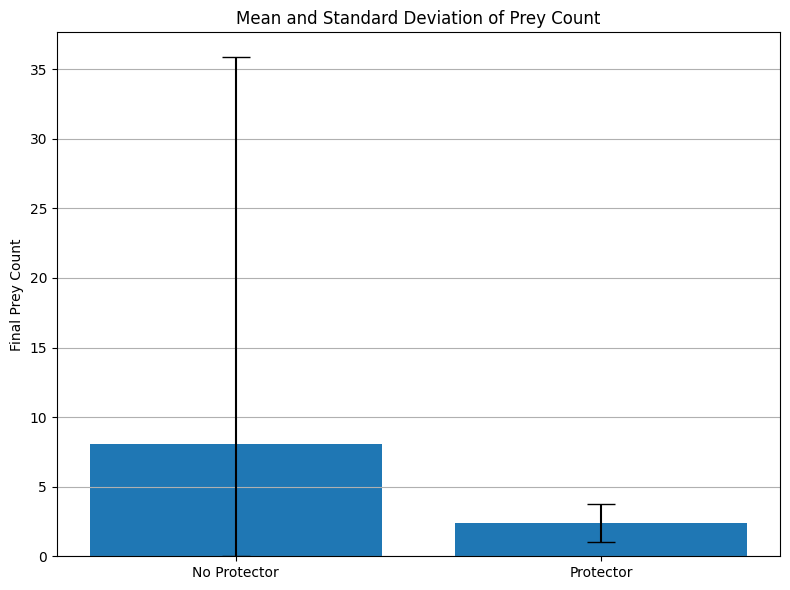

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Compute stats
labels = ['No Protector', 'Protector']
means = [np.mean(no_protector_counts), np.mean(protector_counts)]
stds = [np.std(no_protector_counts), np.std(protector_counts)]

# Ensure error bars don't dip below zero
lower_errors = [min(mean, std) for mean, std in zip(means, stds)]
upper_errors = stds
error_bars = [lower_errors, upper_errors]

# Plot with asymmetric error bars
plt.figure(figsize=(8, 6))
plt.bar(labels, means, yerr=error_bars, capsize=10)
plt.ylabel("Final Prey Count")
plt.title("Mean and Standard Deviation of Prey Count")
plt.grid(axis="y")
plt.tight_layout()
plt.show()